In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import IPython

%matplotlib inline

In [35]:
def bgr2rgb(x):
    b,g,r = cv2.split(x)
    y = cv2.merge([r,g,b])
    return y

def displayimg(x,convert=True):
    if convert==True:
        return display(PIL.Image.fromarray(bgr2rgb(x)))
    else:
        return display(PIL.Image.fromarray(x))
        

img1 = cv2.imread('1.png')
img2 = cv2.imread('2.png')
img3 = cv2.imread('mainlogo.png')

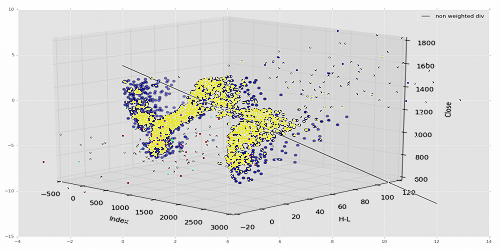

In [36]:
#Direct add
add = img1+img2

displayimg(add)

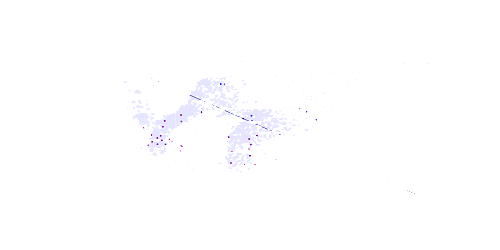

In [37]:
#cv2 add operation (added all the pixel values together)
# (155, 211, 79) + (50, 170, 200) = 205,381,279 --> (205, 255, 255)

add1 = cv2.add(img1,img2)

displayimg(add1)

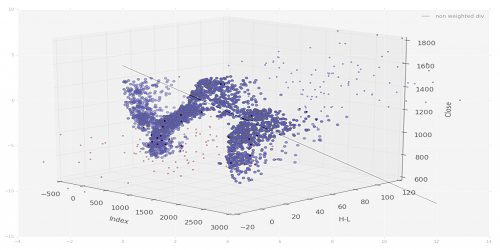

In [38]:
weighted = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)

displayimg(weighted)

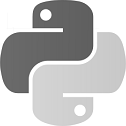

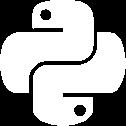

In [44]:
rows, cols, channels = img3.shape
roi = img1[0:rows, 0:cols]

img3_gray = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img3_gray, 220, 255, cv2.THRESH_BINARY_INV)   

#If pixel values is above 220, it will get converted to 225, if its below, then its converted to black
displayimg(img3_gray,False)
displayimg(mask,False)

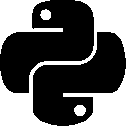

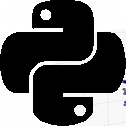

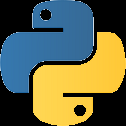

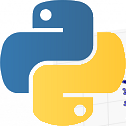

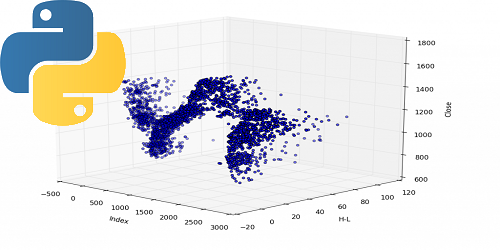

In [51]:
mask_inv = cv2.bitwise_not(mask)

img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
img3_fg = cv2.bitwise_and(img3, img3, mask=mask)
dst = cv2.add(img1_bg, img2_fg)

img1[0:rows, 0:cols]=dst


displayimg(mask_inv,False)
displayimg(img1_bg)
displayimg(img3_fg)
displayimg(dst)
displayimg(img1)